<font color='006A58'>**Social Network Graphs**</font>

The growth of social networking sites has been one of the most active trends in digital media over the years. Since the late 1990s, when the first social applications were published, they have attracted billions of active users worldwide, many of whom have integrated digital social interactions into their daily lives. New ways of communication are being driven by social networks such as Facebook, Twitter, and Instagram, among others. Users can share ideas, post updates and feedback, or engage in activities and events while sharing their broader interests on social networking sites.

Besides, social networks constitute a huge source of information for studying user behaviors, interpreting interaction among people, and predicting their interests. Structuring them as graphs, where a vertex corresponds to a person and an edge represents the connection between them, enables a powerful tool to extract useful knowledge.

However, understanding the dynamics that drive the evolution of a social network is a complex problem due to a large number of variable parameters.

In this series, we will talk about how we can analyze the Facebook social network using graph theory and how we can solve useful problems such as link prediction and community detection using machine learning.

We will be using the Social circles [SNAP Facebook public dataset](https://snap.stanford.edu/data/ego-Facebook.html), from Stanford University.

The dataset was created by collecting Facebook user information from survey participants. Ego networks were created from 10 users. Each user was asked to identify all the circles (list of friends) to which their friends belong. On average, each user identified 19 circles in their ego networks, where each circle has on average 22 friends.

For each user, the following information was collected:
- Edges: An edge exists if two users are friends on Facebook.
- Node features: Features were labeled 1 if the user has this property in their profile and 0 otherwise. Features have been anonymized since the names of the features would reveal private data.

The 10 ego networks were then unified in a single graph that we are going to study.

In [4]:
!wget http://snap.stanford.edu/data/facebook_combined.txt.gz
!wget http://snap.stanford.edu/data/facebook.tar.gz
!gzip -d facebook_combined.txt.gz
!tar -xf facebook.tar.gz

In [5]:
!head facebook_combined.txt

0 1
0 2
0 3
0 4
0 5
0 6
0 7
0 8
0 9
0 10


In [6]:
!ls ./facebook

0.circles      1684.circles    3437.circles    3980.circles    686.circles
0.edges        1684.edges      3437.edges      3980.edges      686.edges
0.egofeat      1684.egofeat    3437.egofeat    3980.egofeat    686.egofeat
0.feat	       1684.feat       3437.feat       3980.feat       686.feat
0.featnames    1684.featnames  3437.featnames  3980.featnames  686.featnames
107.circles    1912.circles    348.circles     414.circles     698.circles
107.edges      1912.edges      348.edges       414.edges       698.edges
107.egofeat    1912.egofeat    348.egofeat     414.egofeat     698.egofeat
107.feat       1912.feat       348.feat        414.feat        698.feat
107.featnames  1912.featnames  348.featnames   414.featnames   698.featnames


In [14]:
!cat ./facebook/0.circles

circle0	71	215	54	61	298	229	81	253	193	97	264	29	132	110	163	259	183	334	245	222
circle1	173
circle2	155	99	327	140	116	147	144	150	270
circle3	51	83	237
circle4	125	344	295	257	55	122	223	59	268	280	84	156	258	236	250	239	69
circle5	23
circle6	337	289	93	17	111	52	137	343	192	35	326	310	214	32	115	321	209	312	41	20
circle7	225	46
circle8	282
circle9	336	204	74	206	292	146	154	164	279	73
circle10	42	14	216	2
circle11	324	265	54	161	298	76	165	199	203	13	66	113	97	252	313	238	158	240	331	332	134	218	118	235	311	151	308	212	70	211
circle12	278
circle13	138	131	68	143	86
circle14	175	227
circle15	108	208	251	125	325	176	133	276	198	271	288	316	96	246	347	121	7	3	170	323	56	338	23	109	141	67	345	55	114	122	50	304	318	65	15	45	317	322	26	31	168	124	285	255	129	40	172	274	95	207	128	339	233	1	294	280	224	269	256	60	328	189	146	77	196	64	286	89	22	39	190	281	117	38	213	135	197	291	21	315	261	47	36	186	169	342	49	9	16	185	219	123	72	309	103	157	277	105	139	148	248	341	62	98	63	297	242	10	152	

In [10]:
!head -5 ./facebook/0.edges

236 186
122 285
24 346
271 304
176 9


In [15]:
!head -5 ./facebook/0.egofeat

0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0


In [17]:
!head -20 ./facebook/0.feat

1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
3 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

In [20]:
!head -10 ./facebook/0.featnames

0 birthday;anonymized feature 0
1 birthday;anonymized feature 1
2 birthday;anonymized feature 2
3 birthday;anonymized feature 3
4 birthday;anonymized feature 4
5 birthday;anonymized feature 5
6 birthday;anonymized feature 6
7 birthday;anonymized feature 7
8 education;classes;id;anonymized feature 8
9 education;classes;id;anonymized feature 9


| File | Description |
| ---- | ----------- |
| nodeId.edges | The edges in the ego network for the node 'nodeId'. Edges are undirected for facebook, and directed (a follows b) for twitter and gplus. The 'ego' node does not appear, but it is assumed that they follow every node id that appears in this file. |
| nodeId.circles | The set of circles for the ego node. Each line contains one circle, consisting of a series of node ids. The first entry in each line is the name of the circle. |
| nodeId.feat | The features for each of the nodes that appears in the edge file. |
| nodeId.egofeat | The features for the ego user. |
| nodeId.featnames | The names of each of the feature dimensions. Features are '1' if the user has this property in their profile, and '0' otherwise. This file has been anonymized for facebook users, since the names of the features would reveal private data. |
| facebook_combined.txt | a list of edges from all the ego networks combined. |

Environment setup

In [ ]:
!pip install community

In [75]:
import os
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import community
from community import community_louvain
import networkx as nx
import networkx.algorithms.community as nx_comm

%matplotlib inline

default_edge_color = 'gray'
default_node_color = '#407cc9'
enhanced_node_color = '#f5b042'
enhanced_edge_color = '#cc2f04'

Building graph layout

In [23]:
G = nx.read_edgelist("facebook_combined.txt", create_using=nx.Graph(), nodetype=int)
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 4039
Number of edges: 88234
Average degree:  43.6910


> Note: Our combined network has 4,039 nodes and more than 80,000 edges.

In [24]:
# let's first create a list of participant ids - we call it ego nodes in literature it seems
ego_nodes = set([int(name.split('.')[0]) for name in os.listdir("./facebook/")])
ego_nodes

{0, 107, 348, 414, 686, 698, 1684, 1912, 3437, 3980}

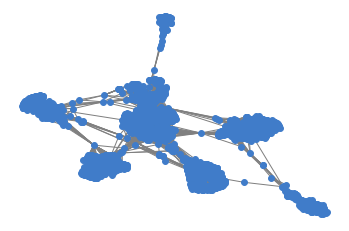

In [25]:
# let's try to visualize the network
spring_pos = nx.spring_layout(G)
plt.axis("off")
nx.draw_networkx(G, pos=spring_pos, node_color=default_node_color,
                 edge_color=default_edge_color, with_labels=False,
                 node_size=35)
plt.show()

Network analysis

In [27]:
def draw_metric(G, dct, spring_pos):
  """ draw the graph G using the layout spring_pos.
      The top 10 nodes w.r.t. values in the dictionary dct
      are enhanced in the visualization """
  top = 10
  max_nodes =  sorted(dct.items(), key = lambda v: -v[1])[:top]
  
  max_keys = [key for key,_ in max_nodes]
  max_vals = [val*300 for _, val in max_nodes]

  plt.axis("off")
  
  nx.draw_networkx(G, 
                   pos=spring_pos, 
                   cmap='Blues', 
                   edge_color=default_edge_color,
                   node_color=default_node_color, 
                   node_size=3,
                   alpha=0.4, 
                   with_labels=False)
  
  nx.draw_networkx_nodes(G, 
                         pos=spring_pos, 
                         nodelist=max_keys, 
                         node_color=enhanced_edge_color,
                         node_size=max_vals)

### Topology analysis

> Note: Assortativity reveals information about the tendency of users to be connected with users with a similar degree.

In [ ]:
# assortativity
assortativity = nx.degree_pearson_correlation_coefficient(G)
assortativity

0.06357722918564912

Here we can observe a positive assortativity, likely showing that well-connected individuals associate with other well-connected individuals. This is expected since inside each circle users might tend to be highly connected to each other.

Transitivity could also help at better understanding how individuals are connected. Recall transitivity indicates the mean probability that two people with a common friend are themselves friends.

In [ ]:
t = nx.transitivity(G)
t

0.5191742775433075

### Node centrality

> Note: betweenness centrality metric measures how many shortest paths pass through a given node, giving an idea of how central that node is for the spreading of information inside the network.

In [28]:
# betweenness centrality
bC = nx.betweenness_centrality(G)
np.mean(list(bC.values()))

0.0006669573568730229

The average betweenness centrality is pretty low, which is understandable given the large amount of non-bridging nodes inside the network. However, we could collect better insight by visual inspection of the graph. In particular, we will draw the combined ego network by enhancing nodes with the highest betweenness centrality.

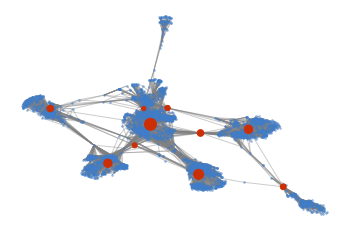

In [29]:
draw_metric(G,bC,spring_pos)

In [30]:
# global efficiency
gE = nx.global_efficiency(G)
print(gE)

0.30657814798734856


In [31]:
# average clustering
aC = nx.average_clustering(G)
print(aC)

0.6055467186200876


In [32]:
# degree centrality
deg_C = nx.degree_centrality(G)
np.mean(list(deg_C.values()))

0.010819963503439287

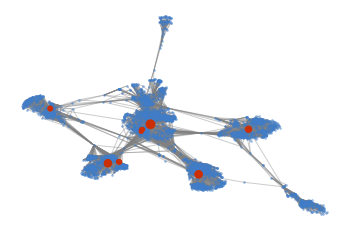

In [33]:
draw_metric(G,deg_C,spring_pos)

In [34]:
# closeness centrality
clos_C = nx.closeness_centrality(G)
np.mean(list(clos_C.values()))

0.2761677635668376

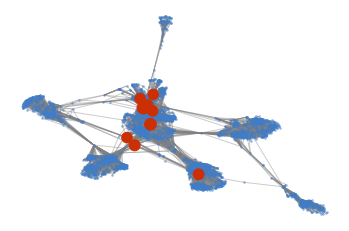

In [35]:
draw_metric(G,clos_C,spring_pos)

From the centrality analysis, it is interesting to observe that each central node seems to be part of a sort of community (this is reasonable, since the central nodes might correspond to the ego nodes of the network). It is also interesting to notice the presence of a bunch of highly interconnected nodes (especially from the closeness centrality analysis).

### Community detection

Since we are performing social network analysis, it is worth exploring one of the most interesting graph structures for social networks: communities. If you use Facebook, it is very likely that your friends reflect different aspects of your life: friends from an educational environment (high school, college, and so on), friends from your weekly football match, friends you have met at parties, and so on.

An interesting aspect of social network analysis is to automatically identify such groups. This can be done automatically, inferring them from topological properties, or semi-automatically, exploiting some prior insight.

One good criterion is to try to minimize intra-community edges (edges connecting members of different communities) while maximizing inter-community edges (connecting members within the same community).

In the following cells we will automatically detect communities using infromation from the network topology

0 is in community number 0
107 is in community number 8
3980 is in community number 13
3437 is in community number 9
686 is in community number 14
1684 is in community number 2
1912 is in community number 4
698 is in community number 14
348 is in community number 1
414 is in community number 1


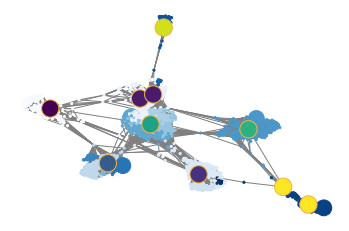

In [48]:
parts = community_louvain.best_partition(G)
values = [parts.get(node) for node in G.nodes()]

for node in ego_nodes:
  print(node, "is in community number", parts.get(node))
  
n_sizes = [5]*len(G.nodes())
for node in ego_nodes:
  n_sizes[node] = 250

plt.axis("off")
nx.draw_networkx(G, pos=spring_pos, cmap=plt.get_cmap("Blues"), edge_color=default_edge_color, node_color=values, node_size=n_sizes, with_labels=False)

# enhance color and size of the ego-nodes
nodes = nx.draw_networkx_nodes(G,spring_pos,ego_nodes,node_color=[parts.get(node) for node in ego_nodes])
nodes.set_edgecolor(enhanced_node_color)

It is interesting to notice that some ego users belong to the same community. It is possible that ego users are actual friends on Facebook, and therefore their ego networks are partially shared.

We have now completed our basic understanding of the graph structure. We now know that some important nodes can be identified inside the network. We have also seen the presence of well-defined communities to which those nodes belong. Keep in mind these observations while performing the next part of the analysis, which is applying machine learning methods for supervised and unsupervised tasks.

### Ego-net analysis

Since the combined network we are analyzing is actually composed by 10 sub-networks (ego-networks), it's interesting to inspect all those subnetwork. In the following cells we will analyze the subnetwork of the ego-user "0".

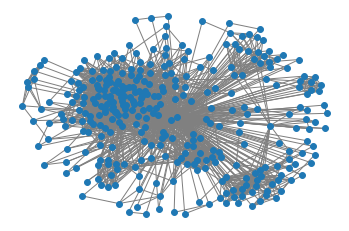

In [50]:
G0 = nx.read_edgelist("./facebook/0.edges", create_using=nx.Graph(), nodetype=int)
for node in G0.copy():
  G0.add_edge(0,node)

plt.axis("off")
pos_G0 = nx.spring_layout(G0)
nx.draw_networkx(G0, pos=pos_G0, with_labels=False, node_size=35, edge_color=default_edge_color)

Nodes belonging to each subnetwork are stored in the "facebook" folder under the name nodeId.circles

In [51]:
circles = {}

with open("./facebook/0.circles") as f_in:
  line = f_in.readline().rstrip().split("\t")
  while line and not '' in line:
    circles[line[0]] = [int(v) for v in line[1:]]
    line = f_in.readline().rstrip().split("\t")

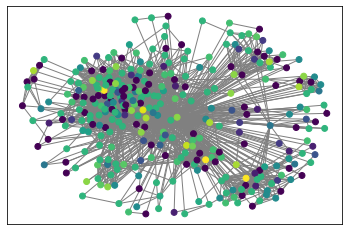

In [52]:
node_colors = [0] * G0.number_of_nodes()
count = 0
for key in circles:
  circle = circles[key]
  for node in circle:
    if node < G0.number_of_nodes():
      node_colors[node] = count
  count += 1

nx.draw_networkx(G0, pos=pos_G0, with_labels=False, node_size=35, node_color=node_colors, edge_color=default_edge_color)

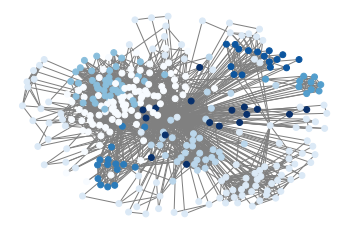

In [54]:
parts = community_louvain.best_partition(G0)
values = [parts.get(node) for node in G0.nodes()]

plt.axis("off")
nx.draw_networkx(G0, pos=pos_G0, cmap=plt.get_cmap("Blues"), edge_color=default_edge_color, node_color=values, node_size=35, with_labels=False)

In [55]:
# community found does not reflect the circles
set(parts.values())
len(circles)

24

In [ ]:
# a node can be present in more than one list??
for i in circles:
  for j in circles:
    if i != j:
      for n1 in circles[i]:
        for n2 in circles[j]:
          if n1 == n2:
            print(n1, 'present in ',i,'found in', j)

In [76]:
vals = {}
vals['Shortest path'] = nx.average_shortest_path_length(G0)
vals['Global efficiency'] = nx.global_efficiency(G0)
vals['Average clustering'] = nx.average_clustering(G0)
vals['Betweenness centrality'] = np.mean(list(nx.betweenness_centrality(G0).values()))
vals['Closeness centrality'] = np.mean(list(nx.closeness_centrality(G0).values()))
vals['Degree centrality'] = np.mean(list(nx.degree_centrality(G0).values()))
vals['Pearson correlation'] = nx.degree_pearson_correlation_coefficient(G)
vals['Transitivity'] = nx.transitivity(G)
vals['Label propagation'] = nx_comm.modularity(G, nx_comm.label_propagation_communities(G))

In [78]:
pd.DataFrame(vals, index=['values']).T

,values
Shortest path,1.948715
Global efficiency,0.525642
Average clustering,0.682005
Betweenness centrality,0.002858
Closeness centrality,0.514174
Degree centrality,0.051285
Pearson correlation,0.063577
Transitivity,0.519174
Label propagation,0.736841
